## Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import gc
import warnings
warnings.filterwarnings('ignore')

### Memory optimization to load the dataframe 

In [5]:
#https://www.kaggle.com/fabiendaniel/elo-world
#Function to load data into pandas and reduce memory usage

def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    #loop for alll the columns in the dataframe 
    for col in df.columns:
        #get the datatype of the column
        col_type = df[col].dtypes
        #if the data type is numeric then only start changing the datatype
        #as it isnt much helpful for other data types 
        if col_type in numerics:
            #stores the min value of the column 
            c_min = df[col].min()
            #stores the maximum value of the column
            c_max = df[col].max()
            #for int type numerics
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            #for float type numerics 
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

### Set the current working directory

In [6]:
cd "D:\Machine Learning Projects\Elo Merchant Recommendation\data"

D:\Machine Learning Projects\Elo Merchant Recommendation\data


Loading Train and Test Files

In [7]:
train = reduce_mem_usage(pd.read_csv('train.csv'))
test =  reduce_mem_usage(pd.read_csv('test.csv'))

Mem. usage decreased to  4.04 Mb (56.2% reduction)
Mem. usage decreased to  2.24 Mb (52.5% reduction)


### Lets look at the train and test files 

In [8]:
train.sample(10)

,first_active_month,card_id,feature_1,feature_2,feature_3,target
135467,2017-11,C_ID_ca520fa8e4,3,2,1,-2.167969
156130,2016-01,C_ID_d0e0ba5012,2,2,0,-2.341797
80717,2016-09,C_ID_f0eca97c9b,3,1,1,0.050415
125636,2017-01,C_ID_5c707620da,4,1,0,1.981445
154215,2017-06,C_ID_9181de2e39,5,1,1,2.072266
84394,2017-08,C_ID_33878b971c,2,2,0,-1.681641
87608,2017-08,C_ID_ba120cc914,3,1,1,-0.628906
153978,2017-12,C_ID_1e33e8fb93,5,1,1,0.485840
77746,2017-08,C_ID_96dd3965e3,3,3,1,0.648438
87930,2016-11,C_ID_ee1a5865b5,3,2,1,0.078247


In [9]:
test.sample(10)

,first_active_month,card_id,feature_1,feature_2,feature_3
72189,2017-03,C_ID_0858124905,3,2,1
61542,2016-01,C_ID_55a0de2f92,3,3,1
43714,2016-08,C_ID_d57da463a7,2,2,0
55666,2016-03,C_ID_1453689c01,3,2,1
84456,2016-04,C_ID_fdd938e106,4,2,0
24091,2015-12,C_ID_7e8f6ae108,4,2,0
119196,2016-03,C_ID_cdc0011da2,5,1,1
92084,2017-09,C_ID_6945753ed0,3,1,1
120984,2016-10,C_ID_f6e3b058e3,2,2,0
62609,2017-04,C_ID_33ce893488,2,1,0


In [10]:
print(train.shape)
print(test.shape)

(201917, 6)
(123623, 5)


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   first_active_month  201917 non-null  object 
 1   card_id             201917 non-null  object 
 2   feature_1           201917 non-null  int8   
 3   feature_2           201917 non-null  int8   
 4   feature_3           201917 non-null  int8   
 5   target              201917 non-null  float16
dtypes: float16(1), int8(3), object(2)
memory usage: 4.0+ MB


In [12]:
len(train.card_id.unique()) #just for peace of mind that we got all the unique values of card Id

201917

In [13]:
train.describe()

,feature_1,feature_2,feature_3,target
count,201917.000000,201917.000000,201917.000000,201917.000000
mean,3.105311,1.745410,0.565569,NaN
std,1.186160,0.751362,0.495683,0.000000
min,1.000000,1.000000,0.000000,-33.218750
25%,2.000000,1.000000,0.000000,-0.883301
50%,3.000000,2.000000,1.000000,-0.023438
75%,4.000000,2.000000,1.000000,0.765625
max,5.000000,3.000000,1.000000,17.968750


#### Load up the data dictonary 

In [14]:
train_dict = pd.read_excel('Data_Dictionary.xlsx', sheet_name='train')

In [15]:
train_dict[1:]

,train.csv,Unnamed: 1
1,Columns,Description
2,card_id,Unique card identifier
3,first_active_month,"'YYYY-MM', month of first purchase"
4,feature_1,Anonymized card categorical feature
5,feature_2,Anonymized card categorical feature
6,feature_3,Anonymized card categorical feature
7,target,Loyalty numerical score calculated 2 months af...


Data Dict Contains the definations of each of the columns 

In [16]:
print("Missing values by features:")
train.isnull().sum(axis=0)

Missing values by features:


first_active_month    0
card_id               0
feature_1             0
feature_2             0
feature_3             0
target                0
dtype: int64

#### Lets see the distribution of target variable in Train dataframe 

In [17]:
tc = "target"

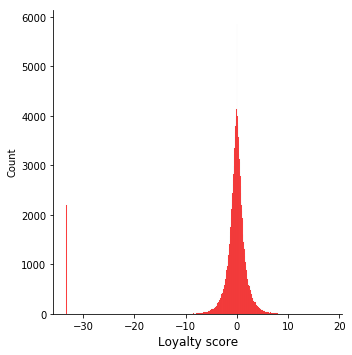

In [18]:
#lets we te distribution of our target columns 
#histogram of the loyality score 
#univariate distribution of numerical data 
plt.figure(figsize=(15,10))
sns.displot(train[tc].values, color="red")
plt.xlabel('Loyalty score', fontsize=12)
plt.show()

When we plot histogram plot of the target variable(loyality score) then we find that some of the points are far apart (less than -30) and when we find the percentage of points which are less than -30 it comes out to be 1.093% 

In [19]:
#Lets see the outliners to find out what is the total percentage of the anomility 
# So as to really consider it as outlinear or not
outliners = train[train[tc] < -30]
outliners

,first_active_month,card_id,feature_1,feature_2,feature_3,target
64,2017-09,C_ID_8186f3fcc1,3,1,1,-33.21875
92,2015-05,C_ID_b9379a30ea,3,3,1,-33.21875
125,2015-10,C_ID_e9120f535c,3,3,1,-33.21875
151,2017-03,C_ID_65715cb80d,4,2,0,-33.21875
225,2017-01,C_ID_ae77d244b6,2,1,0,-33.21875
...,...,...,...,...,...,...
201169,2016-07,C_ID_e34ea29439,2,2,0,-33.21875
201262,2017-10,C_ID_081082a629,5,2,1,-33.21875
201368,2016-08,C_ID_6f61bed11c,3,3,1,-33.21875
201519,2017-05,C_ID_d6c86b18cd,2,1,0,-33.21875


In [20]:
per = outliners.shape[0]/train.shape[0]
print("{:4.8f}% of data points of train are less than -30".format(per*100))

1.09302337% of data points of train are less than -30


We can see that the distribution of target variable is like a normal distribution so any point beyond (3 X std) of mean i.e any point out of 99.73 percent of the distribution so 0.3 percent of data could be said as outliners but as it is 1 percent so it might be some kind of rare data. As there is no description given of the feature 1,2,3 so there cannot be any concreat reasoning that why it may be that but one of the hypotheses is that those card holders didnt buy any stuff so their loyality score is very low

#### Lets see the distribution of First month active and see if there is any difference in the distributon by plotting bar plot

In [21]:
#for train csv
#to see the barplot we need the vect rep of data or we can also pass the pandas series
fma = train['first_active_month'].value_counts()
#sort the values according to the dates 
fma = fma.sort_index()

In [22]:
fma

2011-11        8
2011-12        2
2012-02        7
2012-03       10
2012-04       18
           ...  
2017-10    13695
2017-11    12930
2017-12    10170
2018-01       34
2018-02        1
Name: first_active_month, Length: 75, dtype: int64

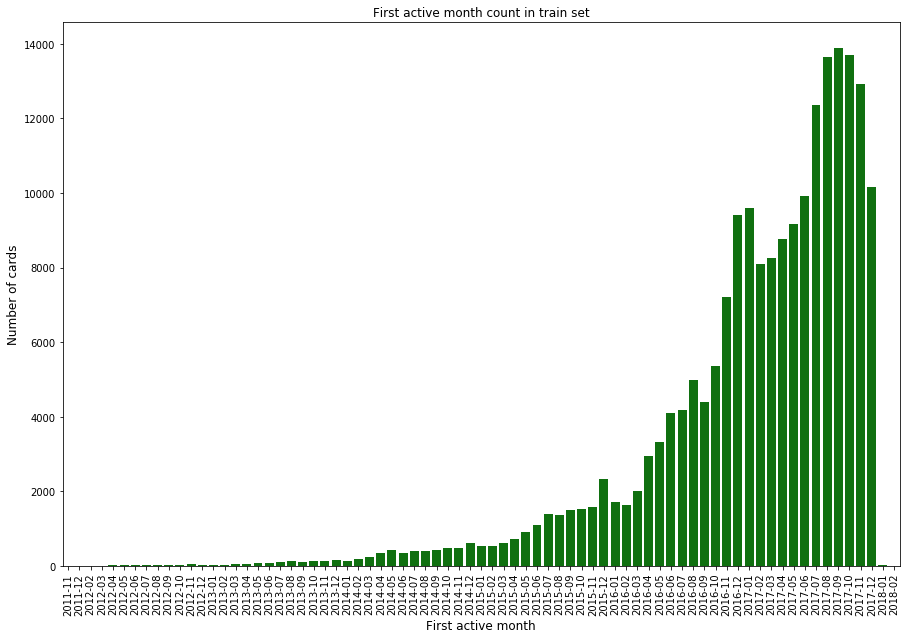

In [23]:
plt.figure(figsize=(15,10))
#the x axis should be the dates and the y axis should show how many card were activated in that time so we pass index and values respectively
sns.barplot(x = fma.index, y = fma.values, color='green')
plt.xticks(rotation='vertical') #it will be difficult to see horizontally
plt.xlabel('First active month', fontsize=12)
plt.ylabel('Number of cards', fontsize=12)
plt.title("First active month count in train set")
plt.show()

Doing the same thing for test csv 

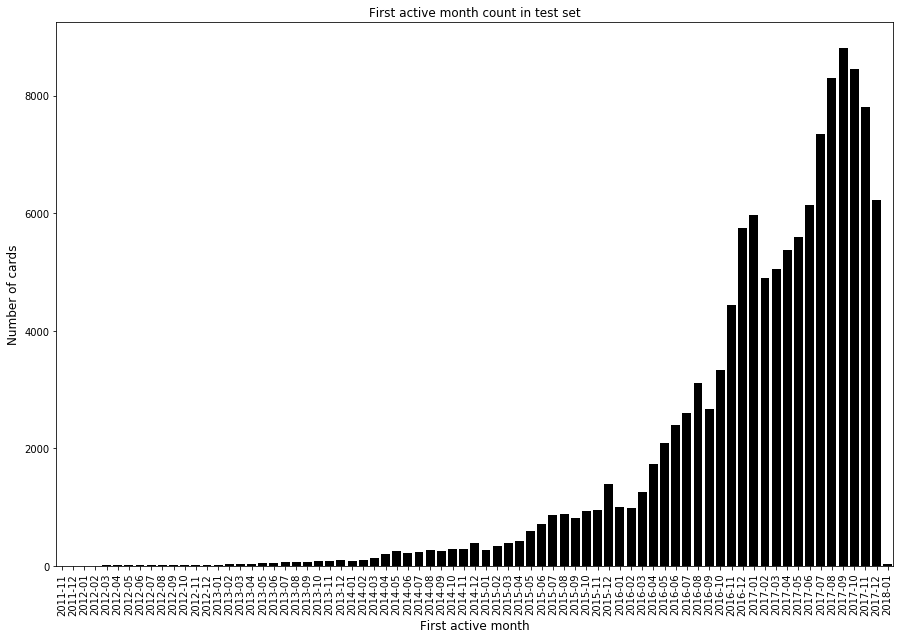

In [24]:
#For test csv file 
fmat = test['first_active_month'].value_counts()
fmat = fmat.sort_index()
plt.figure(figsize=(15,10))
sns.barplot(x = fmat.index, y = fmat.values, color='black')
plt.xticks(rotation='vertical')
plt.xlabel('First active month', fontsize=12)
plt.ylabel('Number of cards', fontsize=12)
plt.title("First active month count in test set")
plt.show()

There isnt any difference between the train and test first month active so splitting of data need not be spatio-temporal(time based splitting)

In [25]:
train['first_active_month'].value_counts()

2017-09    13878
2017-10    13695
2017-08    13638
2017-11    12930
2017-07    12363
           ...  
2012-03       10
2011-11        8
2012-02        7
2011-12        2
2018-02        1
Name: first_active_month, Length: 75, dtype: int64

In [26]:
test['first_active_month'].value_counts()

2017-09    8805
2017-10    8451
2017-08    8299
2017-11    7807
2017-07    7344
           ... 
2012-03      10
2012-02       4
2011-11       3
2011-12       2
2012-01       1
Name: first_active_month, Length: 75, dtype: int64

2017-09 is the most for both the train and test set but why? maybe they got famous that time peroid around, maybe to now that I need to know how business work in a bit more detail

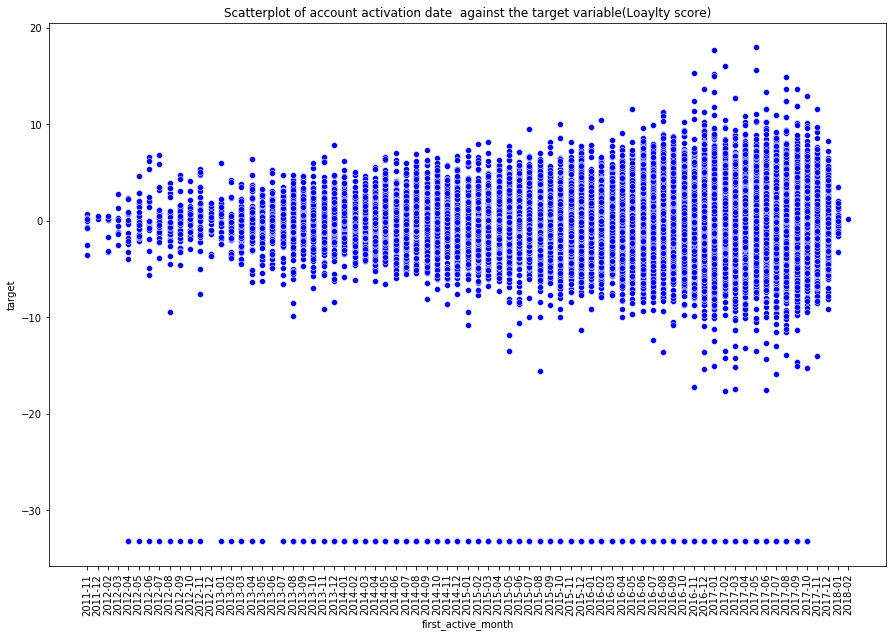

In [27]:
plt.figure(figsize=(15,10))
plt.xticks(rotation='vertical')
sns.scatterplot(x=train['first_active_month'], y=train[tc], color='blue')
plt.title('Scatterplot of account activation date  against the target variable(Loaylty score)')
plt.show()

The more recent the purchase, the more the loyality  score, thi might be a good feature for predicting the loyality score but not seperating the outliner points as er can see it exist in mostly every time frame. Feature enginering with day, moth, hoilday will be benificial for the algorithm 

#### Box plot of feature 1,2,3

Lets see if features 1,2,3 looks good in terms of determining the loyality score, as those features are numeric data, so lets see the box plot distribution based on feature 1,2,3 given the loyality score 

We donot know what exactly is the feature 1,2 and 3 

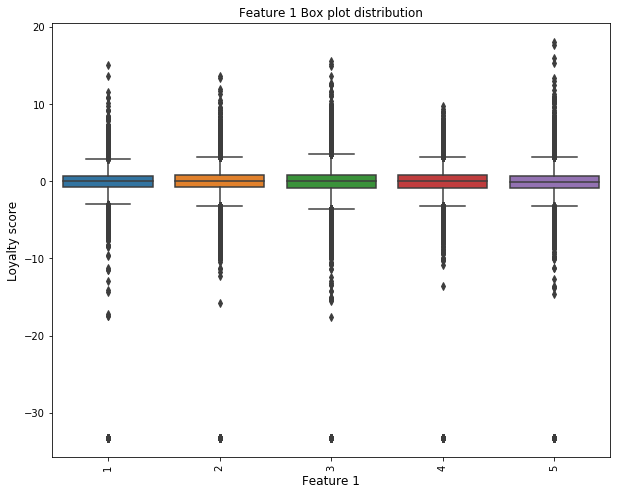

In [28]:
# feature 1
plt.figure(figsize=(10,8))
sns.boxplot(x="feature_1", y=tc, data=train)
plt.xticks(rotation='vertical')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Loyalty score', fontsize=12)
plt.title("Feature 1 Box plot distribution")
plt.show()

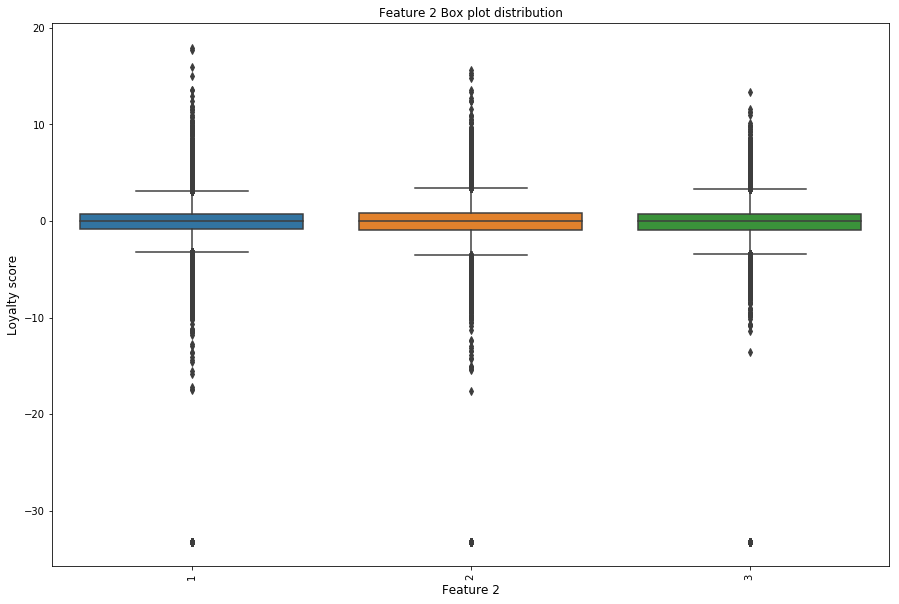

In [29]:
# feature 2
plt.figure(figsize=(15,10))
sns.boxplot(x="feature_2", y=tc, data=train)
plt.xticks(rotation='vertical')
plt.xlabel('Feature 2', fontsize=12)
plt.ylabel('Loyalty score', fontsize=12)
plt.title("Feature 2 Box plot distribution")
plt.show()

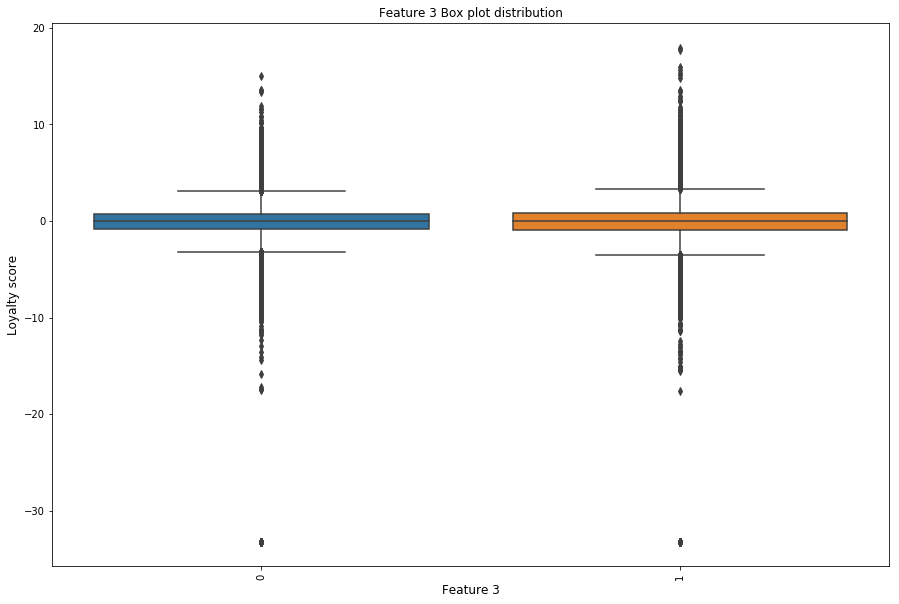

In [30]:
# feature 3
plt.figure(figsize=(15,10))
sns.boxplot(x="feature_3", y=tc, data=train)
plt.xticks(rotation='vertical')
plt.xlabel('Feature 3', fontsize=12)
plt.ylabel('Loyalty score', fontsize=12)
plt.title("Feature 3 Box plot distribution")
plt.show()

The IQR looks the same to me and this isnt much difference between the features for the loyality score as the distribution for the target variable is the same .The distribution looks the same to me,I have no idea how will these features be useful in for the prediction of consumer loyality score but lets see if our linear and non linear based models figure something out. Some feature engineering based on the feature 1,2,3 might help but we will look more into it in the feature engineering part. 

### Historical Transactions 

In [31]:
hist_trans = pd.read_excel('Data_Dictionary.xlsx', sheet_name='history')

In [32]:
hist_df = reduce_mem_usage(pd.read_csv('historical_transactions.csv'))

Mem. usage decreased to 1749.11 Mb (43.7% reduction)


In [33]:
hist_df.sample(100)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
2035140,Y,C_ID_efd523d1c5,69,N,0,A,560,M_ID_7e7bfb5a4c,-1,-0.731881,2018-01-08 21:43:59,1.0,9,34
22956021,Y,C_ID_645dc1a422,-1,Y,1,B,839,M_ID_e5374dabc0,-6,-0.596643,2017-08-02 22:54:43,NaN,-1,29
9382258,Y,C_ID_0f5635e2c2,124,N,0,A,307,M_ID_10d181a34d,-3,-0.581616,2017-11-12 14:15:40,2.0,24,19
17713027,Y,C_ID_4a1cda4ab0,158,N,1,B,367,M_ID_fb6254dc78,0,-0.661557,2018-02-11 19:08:49,1.0,15,16
14177797,Y,C_ID_4f244a3a95,-1,Y,1,B,879,M_ID_9139332ccc,-1,-0.341192,2018-01-18 00:14:50,NaN,-1,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16787871,Y,C_ID_905481e178,212,N,1,B,367,M_ID_40989eb678,-6,-0.726712,2017-05-29 13:22:41,4.0,4,16
2643615,Y,C_ID_e56c9aa695,69,N,1,B,560,M_ID_1ce88c0877,-4,-0.705660,2017-10-04 10:54:25,1.0,9,34
2577394,Y,C_ID_5734cf215f,110,N,0,A,307,M_ID_fb0018bc5f,-1,-0.596643,2018-01-27 18:39:03,1.0,16,19
19381341,Y,C_ID_7a830cae3c,69,N,1,B,367,M_ID_8f7b4791e1,-6,-0.703045,2017-08-18 17:42:04,1.0,9,16


In [34]:
hist_trans[1:]

,historical_transactions.csv,Unnamed: 1
1,Columns,Description
2,card_id,Card identifier
3,month_lag,month lag to reference date
4,purchase_date,Purchase date
5,authorized_flag,"Y' if approved, 'N' if denied"
6,category_3,anonymized category
7,installments,number of installments of purchase
8,category_1,anonymized category
9,merchant_category_id,Merchant category identifier (anonymized )
10,subsector_id,Merchant category group identifier (anonymized )


In [35]:
hist_df.columns

Index(['authorized_flag', 'card_id', 'city_id', 'category_1', 'installments',
       'category_3', 'merchant_category_id', 'merchant_id', 'month_lag',
       'purchase_amount', 'purchase_date', 'category_2', 'state_id',
       'subsector_id'],
      dtype='object')

In [36]:
print("Missing values by features:")
hist_df.isnull().sum(axis=0)

Missing values by features:


authorized_flag               0
card_id                       0
city_id                       0
category_1                    0
installments                  0
category_3               178159
merchant_category_id          0
merchant_id              138481
month_lag                     0
purchase_amount               0
purchase_date                 0
category_2              2652864
state_id                      0
subsector_id                  0
dtype: int64

categopry 2 has a lot of missing values 

#### Lets see what approvale rate has to say us 

In [37]:
#convert the yes and no to 1 and 0
hist_df['authorized_flag'] = hist_df['authorized_flag'].apply(lambda x: 1 if x == 'Y' else 0)

In [38]:
#as now it is numerical just find the mean to get the percent of authorization
print("The percentage of transactions that were authorized ",(hist_df['authorized_flag'].mean() * 100))

The percentage of transactions that were authorized  91.35450058482031


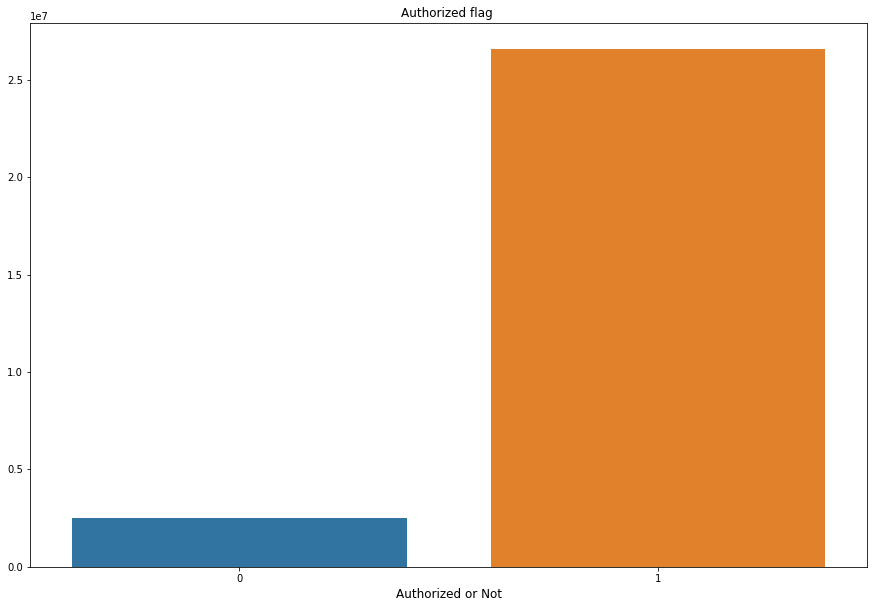

In [39]:
auth = hist_df['authorized_flag'].value_counts()
auth = auth.sort_index()
plt.figure(figsize=(15,10))
sns.barplot(x = auth.index, y = auth.values)
plt.xlabel('Authorized or Not', fontsize=12)
plt.title("Authorized flag ")
plt.show()

Lets see the authorization rate based on the card id i.e lets find out the average sucessfull rate of all the card id 

In [40]:
#find out the average sucess ad denial rate of approval based on card id
autorized_card_rate = hist_df.groupby(['card_id'])['authorized_flag'].agg(['count','mean']).sort_values(['mean'])

In [41]:
autorized_card_rate.head()

,count,mean
card_id,,
C_ID_744d26ea32,164,0.030488
C_ID_bb8dd137c9,162,0.037037
C_ID_e56202cd39,190,0.042105
C_ID_4feacff118,60,0.050000
C_ID_c27b4f80f7,55,0.054545


In [42]:
autorized_card_rate.tail()

,count,mean
card_id,,
C_ID_d048b7cc60,110,1.0
C_ID_4e45fcdb43,13,1.0
C_ID_9f3ee1305e,6,1.0
C_ID_1b52a3e21b,121,1.0
C_ID_d3c3d988d5,113,1.0


It seems that for some cards most of the transactions were declined (0.03 or like that number)

In [43]:
autorized_card_rate[autorized_card_rate['mean'] < 0.3].sort_values('count', ascending = False)

,count,mean
card_id,,
C_ID_5ea401d358,1786,0.154535
C_ID_5e10990e53,672,0.232143
C_ID_e75e342f15,572,0.099650
C_ID_5f2b7601dc,546,0.272894
C_ID_c5d8332b51,527,0.208729
...,...,...
C_ID_ea30c3f99d,9,0.222222
C_ID_0b423425fe,9,0.222222
C_ID_8776596c97,9,0.222222


The loyality score of these all card id must be low compared to the rest of the card id

#### Installments

In [44]:
hist_df['installments'].value_counts()

 0      15411747
 1      11677522
 2        666416
 3        538207
 4        179525
-1        178159
 6        132634
 10       118827
 5        116090
 12        55064
 8         20474
 7         10906
 9          5772
 11          830
 999         188
Name: installments, dtype: int64

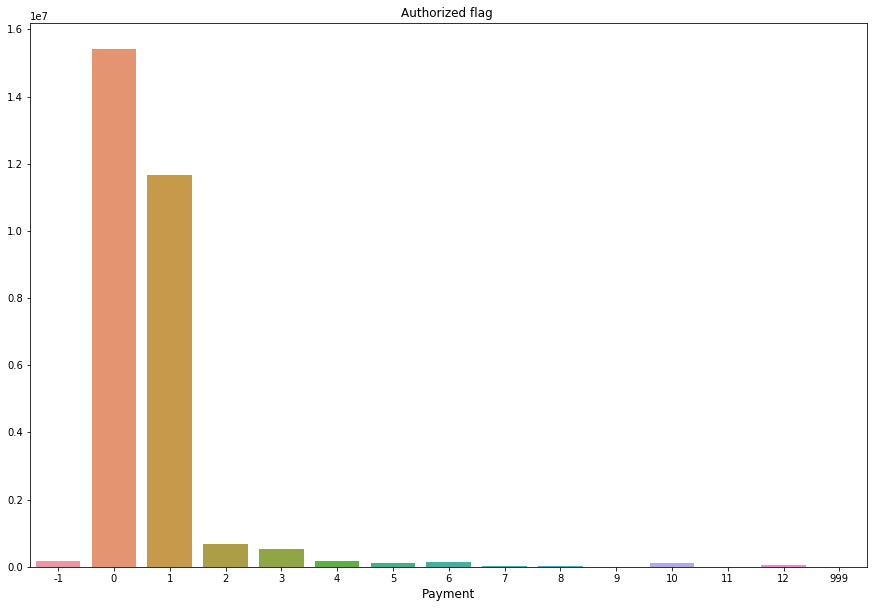

In [45]:
ins = hist_df['installments'].value_counts()
ins = ins.sort_index()
plt.figure(figsize=(15,10))
sns.barplot(x = ins.index, y = ins.values)
plt.xlabel('Payment', fontsize=12)
plt.title("Authorized flag ")
plt.show()

Most of the card holders paid the full amount in the place itself of 1 go

-1 and 999 seems to be a bit fishy , was it used to fill the missing value?

In [46]:
hist_df.groupby(['installments'])['authorized_flag'].agg(['count','mean']).sort_values(['mean'],ascending = False)

,count,mean
installments,,
0,15411747,0.928032
1,11677522,0.907024
-1,178159,0.885692
2,666416,0.884020
3,538207,0.862254
4,179525,0.819903
5,116090,0.809183
6,132634,0.779732
10,118827,0.702021


On the other hand it seems that 999 could mean fraud transactions, considering only 3% of these transactions were approved. One more interesting thing is that the higher the number of installments is, the lower is the approval rate.

The number of installments and the authorization flag combined could also be a factor for loyality score 

#### Purchase amount 

In [47]:
for i in range(0, 101):
  print("{} percentile value is {:3.3f}".format(i, np.percentile(hist_df['purchase_amount'], i)))

0 percentile value is -0.747
1 percentile value is -0.743
2 percentile value is -0.742
3 percentile value is -0.741
4 percentile value is -0.739
5 percentile value is -0.738
6 percentile value is -0.737
7 percentile value is -0.736
8 percentile value is -0.735
9 percentile value is -0.735
10 percentile value is -0.733
11 percentile value is -0.733
12 percentile value is -0.732
13 percentile value is -0.732
14 percentile value is -0.731
15 percentile value is -0.730
16 percentile value is -0.729
17 percentile value is -0.728
18 percentile value is -0.727
19 percentile value is -0.726
20 percentile value is -0.725
21 percentile value is -0.724
22 percentile value is -0.724
23 percentile value is -0.723
24 percentile value is -0.721
25 percentile value is -0.720
26 percentile value is -0.719
27 percentile value is -0.718
28 percentile value is -0.717
29 percentile value is -0.717
30 percentile value is -0.717
31 percentile value is -0.715
32 percentile value is -0.714
33 percentile value 

The purchase value is heavily standaridized, the 99th and 100th percentiles seems a bit fishy. 

#### Category 1,2,3

In [48]:
hist_df['category_1'].unique()

array(['N', 'Y'], dtype=object)

In [49]:
hist_df['category_1'].value_counts()

N    27028332
Y     2084029
Name: category_1, dtype: int64

In [50]:
hist_df['category_2'].unique()

array([ 1., nan,  3.,  5.,  2.,  4.], dtype=float16)

In [51]:
hist_df['category_2'].value_counts()

1.0    15177199
3.0     3911795
5.0     3725915
4.0     2618053
2.0     1026535
Name: category_2, dtype: int64

In [52]:
hist_df['category_3'].unique()

array(['A', 'B', 'C', nan], dtype=object)

In [53]:
hist_df['category_3'].value_counts()

A    15411747
B    11677522
C     1844933
Name: category_3, dtype: int64

In [54]:
yes_no = {'Y': 0, 'N': 1}
#change the yes or no to 0 or 1
hist_df['category_1'] = hist_df['category_1'].apply(lambda x: yes_no[x])
hist_df.groupby(['category_1']).agg({'purchase_amount': ['mean', 'count'], 'authorized_flag': ['mean', 'std']})

purchase_amount           authorized_flag          
                      mean     count            mean       std
category_1                                                    
0                -0.419327   2084029        0.748578  0.433830
1                 0.071540  27028332        0.926265  0.261339

In [55]:
hist_df.groupby(['category_2']).agg({'purchase_amount': ['mean', 'count'], 'authorized_flag': ['mean', 'count']})

purchase_amount           authorized_flag          
                      mean     count            mean     count
category_2                                                    
1.0               0.149570  15177199        0.927505  15177199
2.0              -0.165690   1026535        0.906225   1026535
3.0               0.180375   3911795        0.918857   3911795
4.0              -0.158951   2618053        0.927634   2618053
5.0              -0.104457   3725915        0.934260   3725915

In [56]:
yes_no_nan = {'A': 0, 'B': 1, 'C': 2, 'nan': 3}
hist_df['category_3'] = hist_df['category_3'].apply(lambda x: yes_no_nan[str(x)])
hist_df.groupby(['category_3']).agg({'purchase_amount': ['mean', 'count'], 'authorized_flag': ['mean', 'count']})

purchase_amount           authorized_flag          
                      mean     count            mean     count
category_3                                                    
0                 0.361926  15411747        0.928032  15411747
1                -0.404556  11677522        0.907024  11677522
2                 0.106023   1844933        0.836498   1844933
3                 0.058447    178159        0.885692    178159

All categories are quite different

### New Merchant Transactions

In [57]:
data_dictionary_new_merchant = pd.read_excel('Data_Dictionary.xlsx', sheet_name='new_merchant_period')

In [58]:
new_merchant = reduce_mem_usage(pd.read_csv('new_merchant_transactions.csv'))

Mem. usage decreased to 114.20 Mb (45.5% reduction)


In [59]:
new_merchant

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557617,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569336,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551270,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671875,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659668,2018-03-22 21:07:53,NaN,-1,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963026,Y,C_ID_1320dee851,142,N,0,A,309,M_ID_7754b67f3b,2,-0.701660,2018-04-06 14:36:52,3.0,19,21
1963027,Y,C_ID_f112aa3381,158,N,0,A,560,M_ID_da063195b7,2,-0.694336,2018-03-07 13:19:18,1.0,15,34
1963028,Y,C_ID_bd97b86450,69,N,1,B,278,M_ID_9a9ccb6544,1,-0.621094,2018-03-05 12:04:56,1.0,9,37
1963029,Y,C_ID_c0513fd84f,130,N,0,A,367,M_ID_40c28d596f,1,-0.656738,2018-03-09 14:47:05,3.0,7,16


In [60]:
data_dictionary_new_merchant[1:]

,new_merchant_period.csv,Unnamed: 1
1,Columns,Description
2,card_id,Card identifier
3,month_lag,month lag to reference date
4,purchase_date,Purchase date
5,authorized_flag,"Y' if approved, 'N' if denied"
6,category_3,anonymized category
7,installments,number of installments of purchase
8,category_1,anonymized category
9,merchant_category_id,Merchant category identifier (anonymized )
10,subsector_id,Merchant category group identifier (anonymized )


In [61]:
new_merchant.columns

Index(['authorized_flag', 'card_id', 'city_id', 'category_1', 'installments',
       'category_3', 'merchant_category_id', 'merchant_id', 'month_lag',
       'purchase_amount', 'purchase_date', 'category_2', 'state_id',
       'subsector_id'],
      dtype='object')

In [62]:
new_merchant

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557617,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569336,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551270,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671875,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659668,2018-03-22 21:07:53,NaN,-1,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963026,Y,C_ID_1320dee851,142,N,0,A,309,M_ID_7754b67f3b,2,-0.701660,2018-04-06 14:36:52,3.0,19,21
1963027,Y,C_ID_f112aa3381,158,N,0,A,560,M_ID_da063195b7,2,-0.694336,2018-03-07 13:19:18,1.0,15,34
1963028,Y,C_ID_bd97b86450,69,N,1,B,278,M_ID_9a9ccb6544,1,-0.621094,2018-03-05 12:04:56,1.0,9,37
1963029,Y,C_ID_c0513fd84f,130,N,0,A,367,M_ID_40c28d596f,1,-0.656738,2018-03-09 14:47:05,3.0,7,16


In [63]:
print("Missing values by features:")
new_merchant.isnull().sum(axis=0)

Missing values by features:


authorized_flag              0
card_id                      0
city_id                      0
category_1                   0
installments                 0
category_3               55922
merchant_category_id         0
merchant_id              26216
month_lag                    0
purchase_amount              0
purchase_date                0
category_2              111745
state_id                     0
subsector_id                 0
dtype: int64

#### Authorized Flag

In [64]:
# let's convert the authorized_flag to a binary value(0 or 1).
new_merchant['authorized_flag'] = new_merchant['authorized_flag'].apply(lambda x: 1 if x == 'Y' else 0)

In [65]:
print("The average authorized transactions is ", new_merchant['authorized_flag'].mean())

The average authorized transactions is  1.0


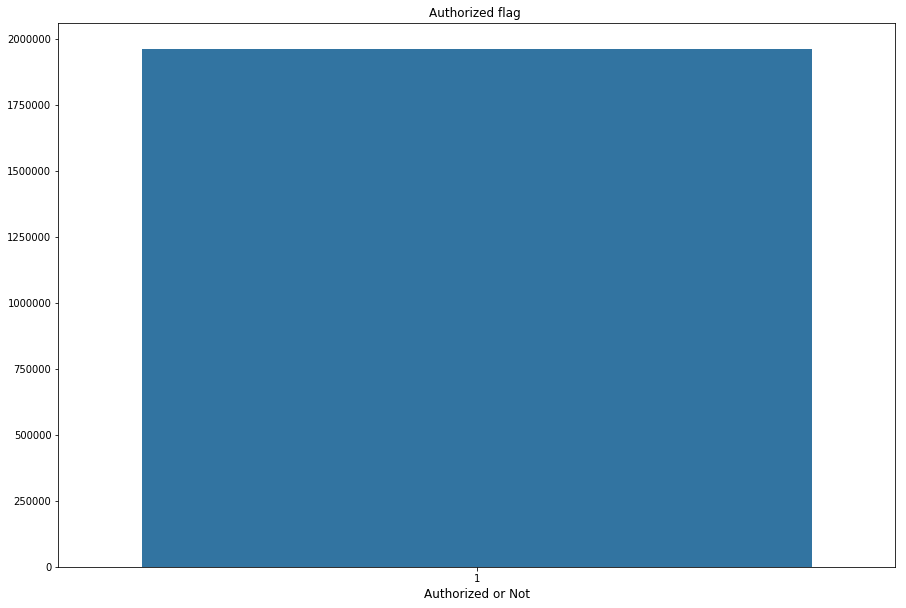

In [66]:
auth_m = new_merchant['authorized_flag'].value_counts()
auth_m = auth_m.sort_index()
plt.figure(figsize=(15,10))
sns.barplot(x = auth_m.index, y = auth_m.values)
plt.xlabel('Authorized or Not', fontsize=12)
plt.title("Authorized flag ")
plt.show()

All purchases were authorised which is better compared to 91 percent to historical data

In [67]:
#I know this aint necessary but just wanted to see out of curiosity
autho_card = new_merchant.groupby(['card_id'])['authorized_flag'].agg(['count','mean']).sort_values(['count'])

In [68]:
autho_card

,count,mean
card_id,,
C_ID_1a16c8e57f,1,1
C_ID_84eae65b08,1,1
C_ID_1fe0534d02,1,1
C_ID_84eb9b91ee,1,1
C_ID_84ed1b6ab4,1,1
...,...,...
C_ID_6cef1dba4b,100,1
C_ID_0e4f6af077,104,1
C_ID_8946508722,104,1


In [69]:
#I know but just checking 
autho_card[autho_card['mean']>0.5]

,count,mean
card_id,,
C_ID_1a16c8e57f,1,1
C_ID_84eae65b08,1,1
C_ID_1fe0534d02,1,1
C_ID_84eb9b91ee,1,1
C_ID_84ed1b6ab4,1,1
...,...,...
C_ID_6cef1dba4b,100,1
C_ID_0e4f6af077,104,1
C_ID_8946508722,104,1


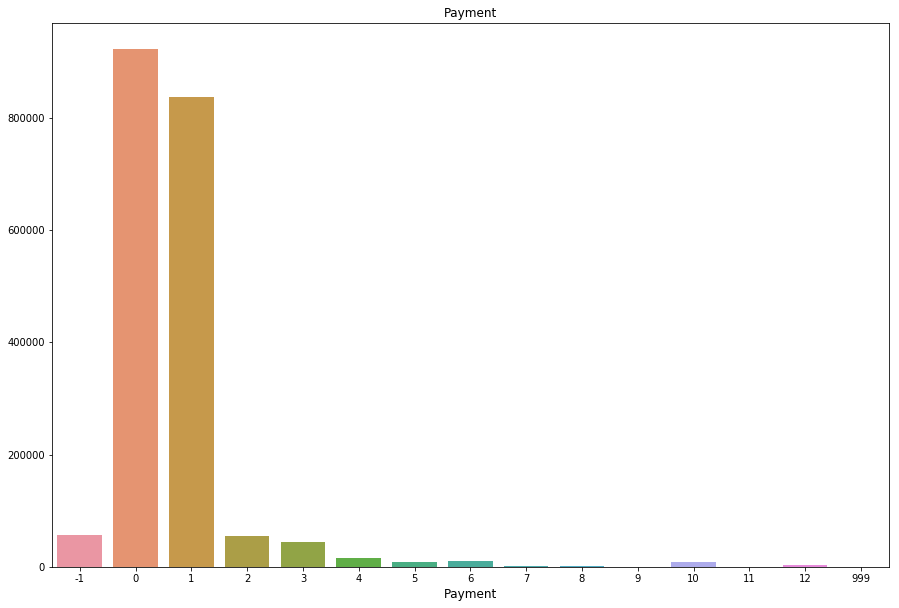

In [70]:
inst = new_merchant['installments'].value_counts()
inst = inst.sort_index()
plt.figure(figsize=(15,10))
sns.barplot(x = inst.index, y = inst.values)
plt.xlabel('Payment', fontsize=12)
plt.title("Payment")
plt.show()

Interesting. Most common number of installments are 0 and 1 which is expected. But -1 and 999 are strange. I think that these values were used to fill in missing values. The same senario as the above 

In [71]:
for i in range(0, 101):
    print("{} percentile value is {:3.7f}".format(i, np.percentile(new_merchant['purchase_amount'], i)))

0 percentile value is -0.7470703
1 percentile value is -0.7421875
2 percentile value is -0.7407227
3 percentile value is -0.7392578
4 percentile value is -0.7377930
5 percentile value is -0.7363281
6 percentile value is -0.7348633
7 percentile value is -0.7343750
8 percentile value is -0.7329102
9 percentile value is -0.7319336
10 percentile value is -0.7319336
11 percentile value is -0.7304688
12 percentile value is -0.7290039
13 percentile value is -0.7280273
14 percentile value is -0.7270508
15 percentile value is -0.7260742
16 percentile value is -0.7246094
17 percentile value is -0.7246094
18 percentile value is -0.7226562
19 percentile value is -0.7216797
20 percentile value is -0.7202148
21 percentile value is -0.7192383
22 percentile value is -0.7177734
23 percentile value is -0.7167969
24 percentile value is -0.7167969
25 percentile value is -0.7167969
26 percentile value is -0.7148438
27 percentile value is -0.7133789
28 percentile value is -0.7119141
29 percentile value is -

Here too the 99th percentile and 100th percentile are bit of outliners, more specifically 100th percentile one 

In [72]:
new_merchant['category_1'].unique()

array(['N', 'Y'], dtype=object)

In [73]:
new_merchant['category_1'].value_counts()

N    1899935
Y      63096
Name: category_1, dtype: int64

In [74]:
new_merchant['category_2'].unique()

array([ 1., nan,  3.,  2.,  4.,  5.], dtype=float16)

In [75]:
new_merchant['category_2'].value_counts()

1.0    1058242
3.0     289525
5.0     259266
4.0     178590
2.0      65663
Name: category_2, dtype: int64

In [76]:
new_merchant['category_3'].unique()

array(['B', nan, 'C', 'A'], dtype=object)

In [77]:
new_merchant['category_3'].value_counts()

A    922244
B    836178
C    148687
Name: category_3, dtype: int64

In [78]:
yes_no = {'Y': 0, 'N': 1}
#change the yes or no to 0 or 1
new_merchant['category_1'] = new_merchant['category_1'].apply(lambda x: yes_no[x])
new_merchant.groupby(['category_1']).agg({'purchase_amount': ['mean', 'count'], 'authorized_flag': ['mean', 'count']})

purchase_amount          authorized_flag         
                      mean    count            mean    count
category_1                                                  
0                -0.218628    63096               1    63096
1                -0.562012  1899935               1  1899935

In [79]:
new_merchant.groupby(['category_2']).agg({'purchase_amount': ['mean', 'count'], 'authorized_flag': ['mean', 'std']})

purchase_amount          authorized_flag     
                      mean    count            mean  std
category_2                                              
1.0              -0.569336  1058242               1  0.0
2.0              -0.555664    65663               1  0.0
3.0              -0.550781   289525               1  0.0
4.0              -0.557617   178590               1  0.0
5.0              -0.548828   259266               1  0.0

In [80]:
abcnan = {'A': 0, 'B': 1, 'C':2,'nan': 3}
#change the yes or no to 0 or 1
new_merchant['category_3'] = new_merchant['category_3'].apply(lambda x: abcnan[str(x)])
new_merchant.groupby(['category_3']).agg({'purchase_amount': ['mean', 'count'], 'authorized_flag': ['mean', 'count']})

purchase_amount         authorized_flag        
                      mean   count            mean   count
category_3                                                
0                -0.630859  922244               1  922244
1                -0.606445  836178               1  836178
2                 0.037720  148687               1  148687
3                 0.034027   55922               1   55922

### Merchant

In [81]:
data_dictionary_merchant = pd.read_excel('Data_Dictionary.xlsx', sheet_name='merchant')

In [82]:
mer = reduce_mem_usage(pd.read_csv('merchants.csv'))

Mem. usage decreased to 30.32 Mb (46.0% reduction)


In [83]:
data_dictionary_merchant[1:]

,merchants.csv,Unnamed: 1
1,Columns,Description
2,merchant_id,Unique merchant identifier
3,merchant_group_id,Merchant group (anonymized )
4,merchant_category_id,Unique identifier for merchant category (anony...
5,subsector_id,Merchant category group (anonymized )
6,numerical_1,anonymized measure
7,numerical_2,anonymized measure
8,category_1,anonymized category
9,most_recent_sales_range,Range of revenue (monetary units) in last acti...
10,most_recent_purchases_range,Range of quantity of transactions in last acti...


In [84]:
mer

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057465,-0.057465,N,E,E,-0.400000,...,-2.250000,18.666667,6,-2.320000,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057465,-0.057465,N,E,E,-0.720000,...,-0.740000,1.291667,6,-0.570000,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057465,-0.057465,N,E,E,-82.129997,...,-82.129997,260.000000,2,-82.129997,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057465,-0.057465,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057465,-0.057465,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334691,M_ID_1f4773aa76,1145,705,33,3.173828,-0.047546,N,A,A,1.000000,...,0.990000,1.019505,6,1.000000,1.024796,12,Y,69,9,1.0
334692,M_ID_725a60d404,35,544,29,-0.057465,-0.057465,Y,A,A,0.890000,...,0.780000,0.813473,6,0.590000,0.606765,12,Y,-1,-1,NaN
334693,M_ID_f2045dd267,35,561,7,-0.057465,-0.057465,N,A,A,0.960000,...,0.900000,0.924769,6,0.740000,0.750763,8,Y,160,21,5.0
334694,M_ID_9139332ccc,35,511,7,-0.057465,-0.057465,Y,A,A,0.940000,...,0.820000,0.783000,6,0.650000,0.584000,12,Y,-1,-1,NaN


In [85]:
print("Missing values by features:")
mer.isnull().sum(axis=0)

Missing values by features:


merchant_id                        0
merchant_group_id                  0
merchant_category_id               0
subsector_id                       0
numerical_1                        0
numerical_2                        0
category_1                         0
most_recent_sales_range            0
most_recent_purchases_range        0
avg_sales_lag3                    13
avg_purchases_lag3                 0
active_months_lag3                 0
avg_sales_lag6                    13
avg_purchases_lag6                 0
active_months_lag6                 0
avg_sales_lag12                   13
avg_purchases_lag12                0
active_months_lag12                0
category_4                         0
city_id                            0
state_id                           0
category_2                     11887
dtype: int64

#### Numerical Features

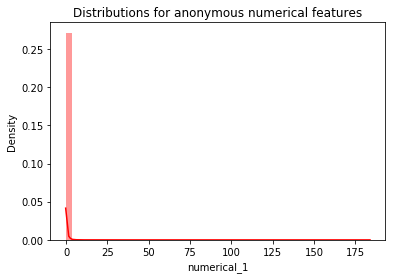

In [86]:
sns.distplot(mer['numerical_1'], color='red')
plt.title('Distributions for anonymous numerical features')
plt.show()

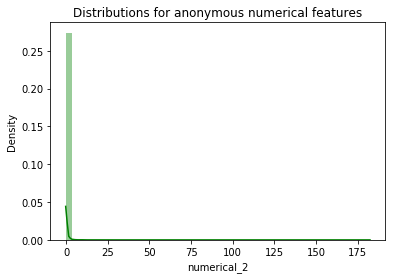

In [87]:
sns.distplot(mer['numerical_2'], color='green')
plt.title('Distributions for anonymous numerical features')
plt.show()

The numerical values were alrready normalized and it is anonymized, s not much information from this 

### anonymized categories

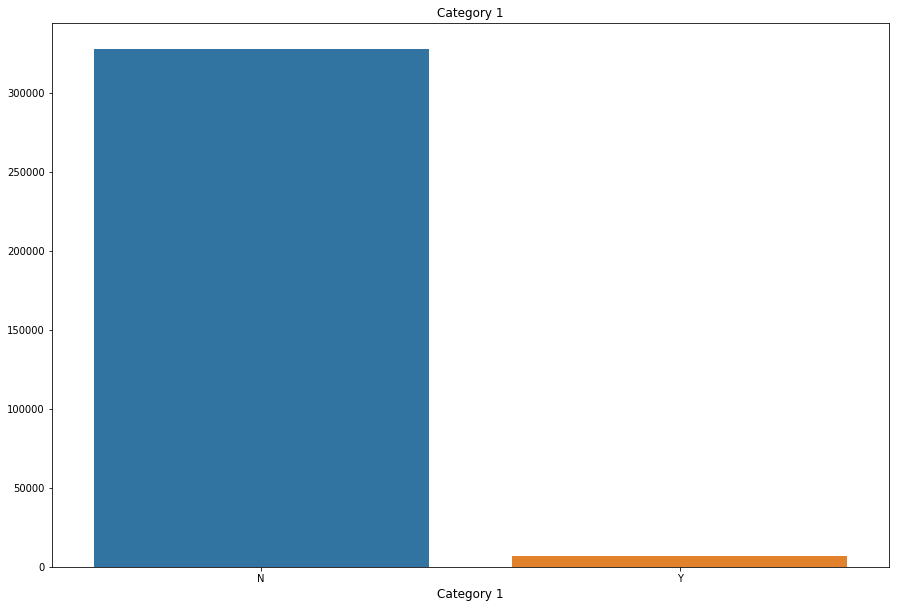

In [88]:
cat1 = mer['category_1'].value_counts()
cat1 = cat1.sort_index()
plt.figure(figsize=(15,10))
sns.barplot(x = cat1.index, y = cat1.values)
plt.xlabel('Category 1', fontsize=12)
plt.title("Category 1")
plt.show()

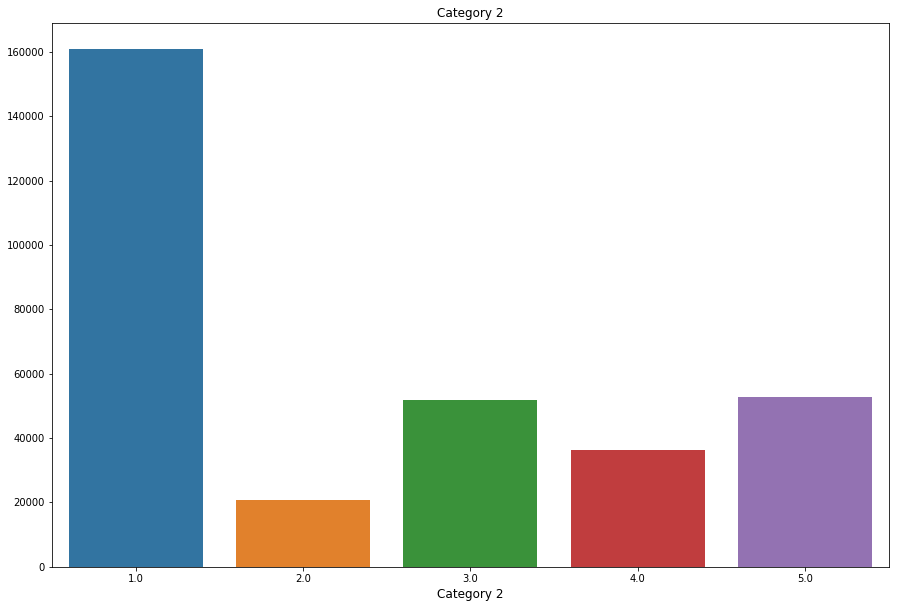

In [89]:
cat2 = mer['category_2'].value_counts()
cat2 = cat2.sort_index()
plt.figure(figsize=(15,10))
sns.barplot(x = cat2.index, y = cat2.values)
plt.xlabel('Category 2', fontsize=12)
plt.title("Category 2")
plt.show()

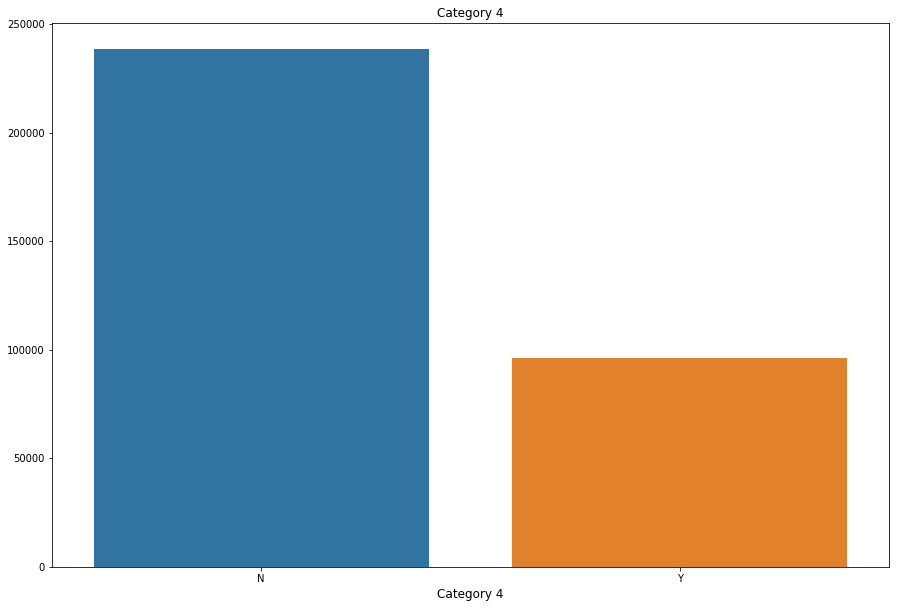

In [90]:
cat4 = mer['category_4'].value_counts()
cat4 = cat4.sort_index()
plt.figure(figsize=(15,10))
sns.barplot(x = cat4.index, y = cat4.values)
plt.xlabel('Category 4', fontsize=12)
plt.title("Category 4")
plt.show()

These are also an anonymized columns but this could help for machine learning algo but it doesnt give much info about merchants 

### Recent Sales and Active months

In [91]:
mer['most_recent_sales_range'].value_counts()

E    177104
D    117475
C     34075
B      5037
A      1005
Name: most_recent_sales_range, dtype: int64

E group did the most sales and A did the least

In [92]:
mer['most_recent_purchases_range'].value_counts()

E    175309
D    119187
C     34144
B      5046
A      1010
Name: most_recent_purchases_range, dtype: int64

The same here and its only logical that who ever did the most sale will have purchase(quantity of transactions) the most 

Quantity of active months within last 3 months

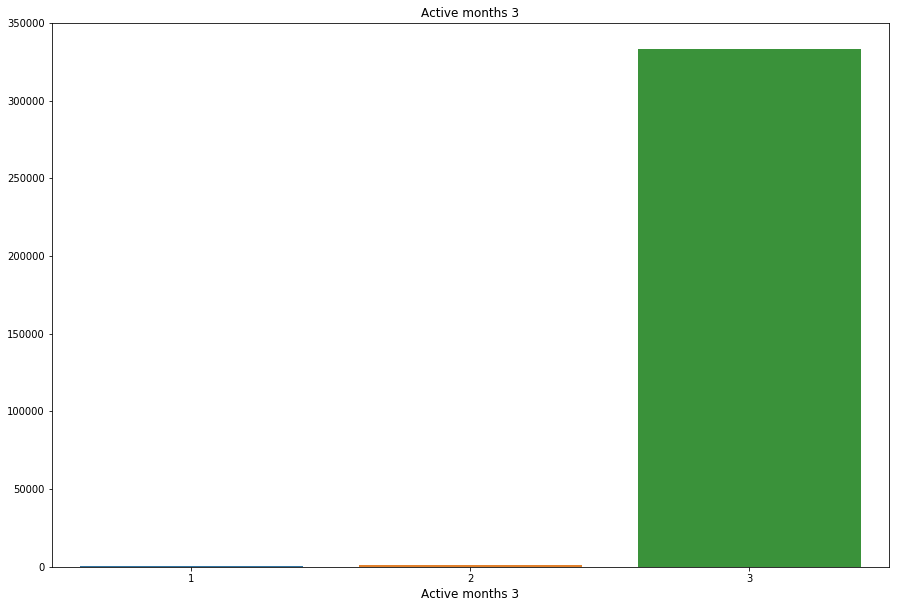

In [93]:
act3 = mer['active_months_lag3'].value_counts()
act3 = act3.sort_index()
plt.figure(figsize=(15,10))
sns.barplot(x = act3.index, y = act3.values)
plt.xlabel('Active months 3', fontsize=12)
plt.title("Active months 3")
plt.show()

In [94]:
print(mer['active_months_lag3'].value_counts())

3    333262
2       896
1       538
Name: active_months_lag3, dtype: int64


Most of the merchants were active during the last 3 months, this could mean a better loyalty score for those who were active and a bad loyalty score who weren't

Quantity of active months within last 6 months

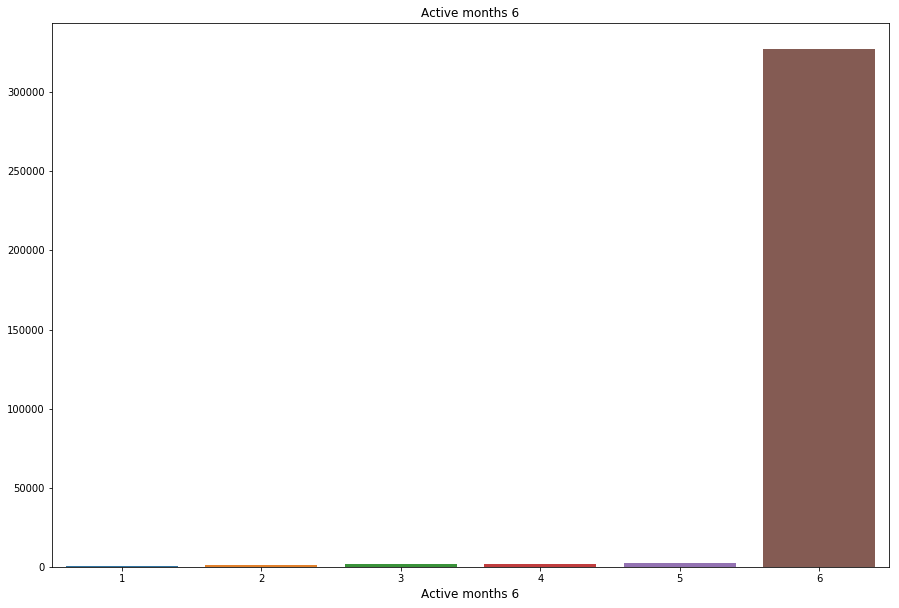

In [95]:
act6 = mer['active_months_lag6'].value_counts()
act6 = act6.sort_index()
plt.figure(figsize=(15,10))
sns.barplot(x = act6.index, y = act6.values)
plt.xlabel('Active months 6', fontsize=12)
plt.title("Active months 6")
plt.show()

In [96]:
print(mer['active_months_lag6'].value_counts())

6    327284
5      2276
4      2050
3      1652
2       896
1       538
Name: active_months_lag6, dtype: int64


Most of the merchants were active in the last 6 months which could lead to a better loyalty score compared to those who didn't have 

Quantity of active months in the last 12 months

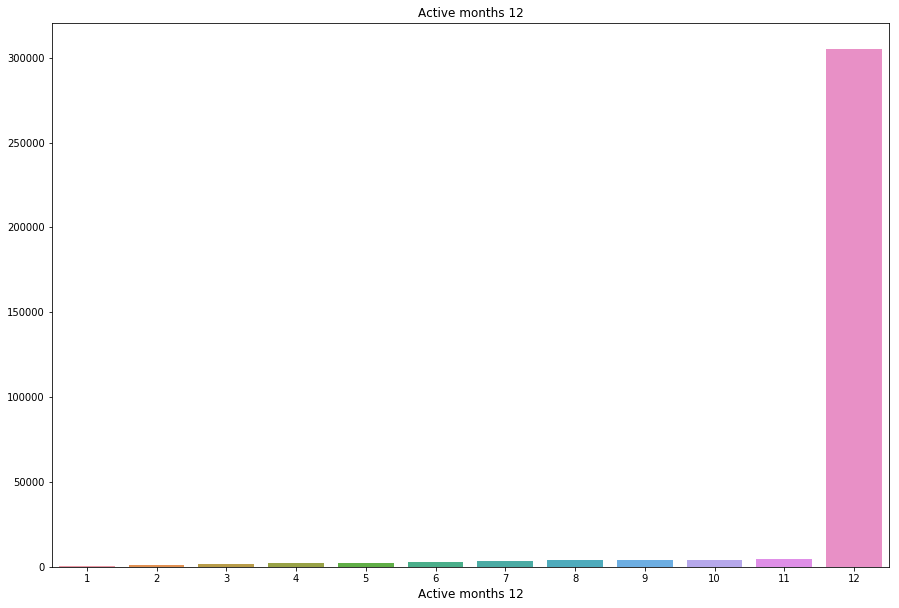

In [97]:
act12 = mer['active_months_lag12'].value_counts()
act12 = act12.sort_index()
plt.figure(figsize=(15,10))
sns.barplot(x = act12.index, y = act12.values)
plt.xlabel('Active months 12', fontsize=12)
plt.title("Active months 12")
plt.show()

In [98]:
print(mer['active_months_lag12'].value_counts())

12    305101
11      4449
10      4143
9       3824
8       3756
7       3274
6       2737
5       2276
4       2050
3       1652
2        896
1        538
Name: active_months_lag12, dtype: int64


Roughly 90 percent of the merchants were active during the last 12 months so that would also lead to a better loyality score 

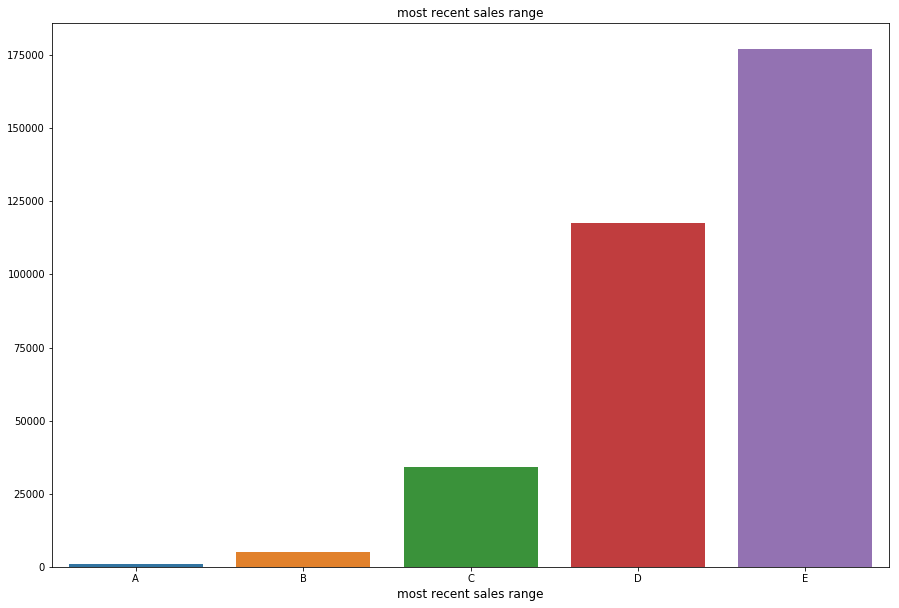

In [99]:
most_r = mer['most_recent_sales_range'].value_counts()
temp = most_r.sort_index()
plt.figure(figsize=(15,10))
sns.barplot(x = temp.index, y = temp.values)
plt.xlabel('most recent sales range', fontsize=12)
plt.title("most recent sales range")
plt.show()

In [100]:
mer.columns

Index(['merchant_id', 'merchant_group_id', 'merchant_category_id',
       'subsector_id', 'numerical_1', 'numerical_2', 'category_1',
       'most_recent_sales_range', 'most_recent_purchases_range',
       'avg_sales_lag3', 'avg_purchases_lag3', 'active_months_lag3',
       'avg_sales_lag6', 'avg_purchases_lag6', 'active_months_lag6',
       'avg_sales_lag12', 'avg_purchases_lag12', 'active_months_lag12',
       'category_4', 'city_id', 'state_id', 'category_2'],
      dtype='object')

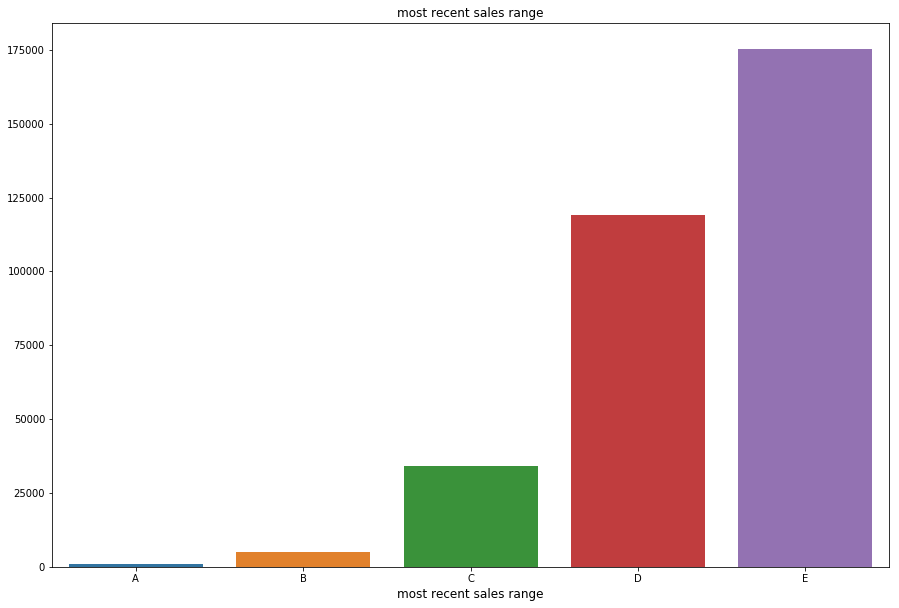

In [101]:
most_p = mer['most_recent_purchases_range'].value_counts()
temp = most_p.sort_index()
plt.figure(figsize=(15,10))
sns.barplot(x = temp.index, y = temp.values)
plt.xlabel('most recent sales range', fontsize=12)
plt.title("most recent sales range")
plt.show()

### Exploring the connections bettween the data 


In [102]:
#Refer:-https://github.com/alvarorgaz/Kaggle-Elo-Merchant-Category-Recommendation/blob/master/1.%20Exploratory%20Data%20Analysis%20(EDA).ipynb

In [103]:
def isin(a,b):
    From = pd.DataFrame(a)
    To = pd.DataFrame(b)
    return(np.mean(From[0].isin(To[0])))

In [104]:
print(" In train and test with card ID",isin(train["card_id"].unique(),test["card_id"].unique()))
print(" In train and historical with card ID",isin(train["card_id"].unique(),hist_df["card_id"].unique()))
print(" In train and Merchant with card ID",isin(train["card_id"].unique(),new_merchant["card_id"].unique()))
print(" In Historical and test with card ID",isin(test["card_id"].unique(),hist_df["card_id"].unique()))
print(" In New Merchant and test with card ID",isin(test["card_id"].unique(),new_merchant["card_id"].unique()))
print(" In historical  and New Merchant with card ID",isin(hist_df["card_id"].unique(),new_merchant["card_id"].unique()))
print(" In historical  and  Merchant with merchant ID ",isin(hist_df["merchant_id"].unique(),mer["merchant_id"].unique()))
print(" In Merchant and New Merchant with merchant ID ",isin(mer["merchant_id"].unique(),new_merchant["merchant_id"].unique()))
print(" In Train and New Merchant with Card ID ",isin(new_merchant["card_id"].unique(),train["card_id"].unique()))

 In train and test with card ID 0.0
 In train and historical with card ID 1.0
 In train and Merchant with card ID 0.8913860645710862
 In Historical and test with card ID 1.0
 In New Merchant and test with card ID 0.8899233961317877
 In historical  and New Merchant with card ID 0.8908306198931006
 In historical  and  Merchant with merchant ID  0.9999969354482826
 In Merchant and New Merchant with merchant ID  0.6757522420084092
 In Train and New Merchant with Card ID  0.6206392391750374


### Null value in any of the dataframe 

In [105]:
for i in new_merchant.columns:
  print('The null value present in {} feature of new_merchant is {}'.format(i,new_merchant[i].isnull().any()))

The null value present in authorized_flag feature of new_merchant is False
The null value present in card_id feature of new_merchant is False
The null value present in city_id feature of new_merchant is False
The null value present in category_1 feature of new_merchant is False
The null value present in installments feature of new_merchant is False
The null value present in category_3 feature of new_merchant is False
The null value present in merchant_category_id feature of new_merchant is False
The null value present in merchant_id feature of new_merchant is True
The null value present in month_lag feature of new_merchant is False
The null value present in purchase_amount feature of new_merchant is False
The null value present in purchase_date feature of new_merchant is False
The null value present in category_2 feature of new_merchant is True
The null value present in state_id feature of new_merchant is False
The null value present in subsector_id feature of new_merchant is False


Merchant id and category 2

In [106]:
for i in train.columns:
  print('The null value present in {} feature of train is {}'.format(i,train[i].isnull().any()))

The null value present in first_active_month feature of train is False
The null value present in card_id feature of train is False
The null value present in feature_1 feature of train is False
The null value present in feature_2 feature of train is False
The null value present in feature_3 feature of train is False
The null value present in target feature of train is False


In [107]:
for i in hist_df.columns:
  print('The null value present in {} feature of hist_df is {}'.format(i,hist_df[i].isnull().any()))

The null value present in authorized_flag feature of hist_df is False
The null value present in card_id feature of hist_df is False
The null value present in city_id feature of hist_df is False
The null value present in category_1 feature of hist_df is False
The null value present in installments feature of hist_df is False
The null value present in category_3 feature of hist_df is False
The null value present in merchant_category_id feature of hist_df is False
The null value present in merchant_id feature of hist_df is True
The null value present in month_lag feature of hist_df is False
The null value present in purchase_amount feature of hist_df is False
The null value present in purchase_date feature of hist_df is False
The null value present in category_2 feature of hist_df is True
The null value present in state_id feature of hist_df is False
The null value present in subsector_id feature of hist_df is False


Merchant id and category 2

In [108]:
for i in mer.columns:
  print('The null value present in {} feature of mer is {}'.format(i,mer[i].isnull().any()))

The null value present in merchant_id feature of mer is False
The null value present in merchant_group_id feature of mer is False
The null value present in merchant_category_id feature of mer is False
The null value present in subsector_id feature of mer is False
The null value present in numerical_1 feature of mer is False
The null value present in numerical_2 feature of mer is False
The null value present in category_1 feature of mer is False
The null value present in most_recent_sales_range feature of mer is False
The null value present in most_recent_purchases_range feature of mer is False
The null value present in avg_sales_lag3 feature of mer is True
The null value present in avg_purchases_lag3 feature of mer is False
The null value present in active_months_lag3 feature of mer is False
The null value present in avg_sales_lag6 feature of mer is True
The null value present in avg_purchases_lag6 feature of mer is False
The null value present in active_months_lag6 feature of mer is F

avg_sales_lag3,avg_sales_lag6,avg_sales_lag12,category 2